In [ ]:
# this script is orignally from myeloid_fig
# this script plots monocytes only umap and density plots

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scanpy as sc
import numpy as np
import pandas as pd
from matplotlib.pyplot import rc_context
pd.set_option('display.max_rows', 200)
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
#sc.logging.print_versions() #print version of package
sc.logging.print_header()
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=120, color_map='viridis')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.4 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.3 statsmodels==0.13.5 python-igraph==0.10.2 pynndescent==0.5.8


In [2]:
adata = sc.read('/home/jovyan/mounting_point/renal_covid_19_gex_myeloid_soupX_QC_orig.ident_annotated_levle23.h5ad')

In [3]:
adata.obs['annot4'] = adata.obs['annot4'].str.replace('CD14mono_activated','CD14mono')
adata.obs['annot4'] = adata.obs['annot4'].str.replace('CD14mono_anti_inflammatory','CD14mono_alt_act')

In [4]:
monocyte_only = adata[adata.obs['annot4'].isin(['CD14mono','CD14mono_IFN','CD14mono_alt_act','CD16mono','CD16mono_IFN','CD16mono_C1','Int.mono'])]

In [5]:
monocyte_only.obs['annot4'].unique()

array(['CD14mono', 'CD16mono', 'Int.mono', 'CD16mono_C1', 'CD16mono_IFN',
       'CD14mono_IFN', 'CD14mono_alt_act'], dtype=object)

/home/jovyan/.local/lib/python3.8/site-packages/anndata-0.8.0-py3.8.egg/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/jovyan/my-conda-envs/Py_env2/lib/python3.8/contextlib.py:120: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


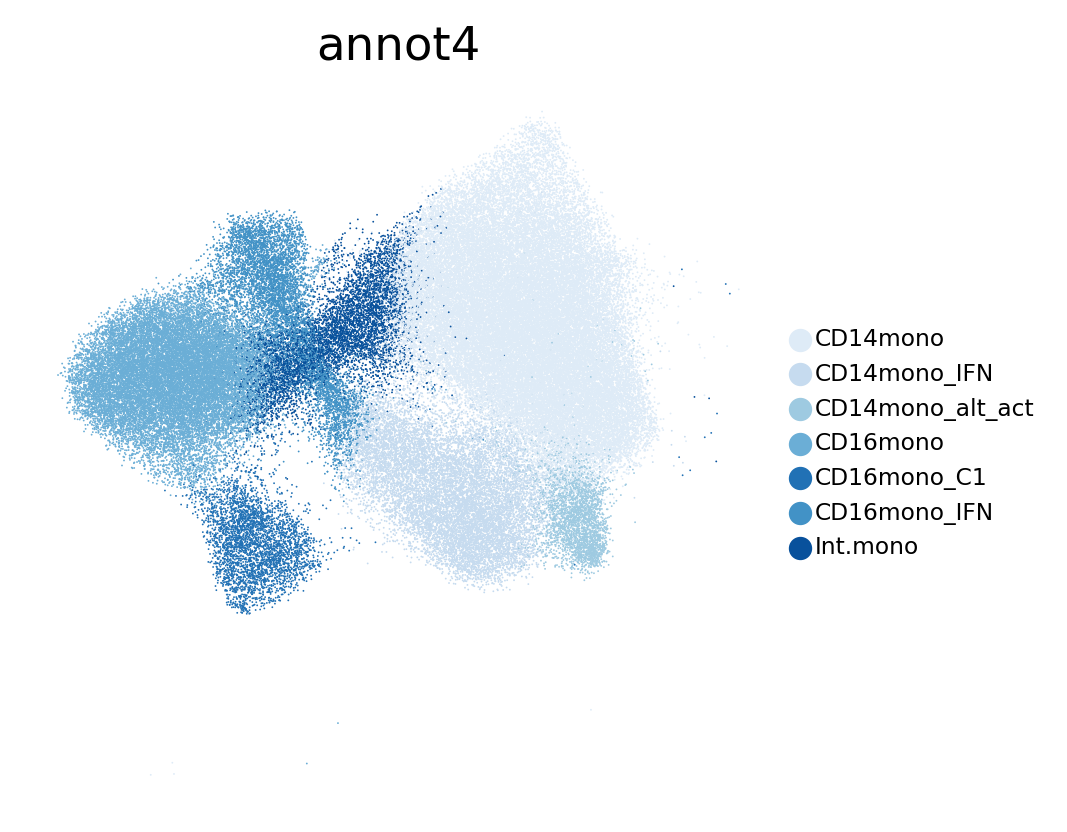

In [6]:
with rc_context({'figure.figsize': (4, 4)}): 
    sc.pl.umap(monocyte_only,use_raw=False,neighbors_key='X_pca_harmony_orig.ident',color=['annot4'], legend_fontsize = 7,
           frameon=False,palette ={ 'CD14mono':'#DEEBF7',
'CD14mono_IFN':'#C6DBEF',
        'CD14mono_alt_act':'#9ECAE1',
        'CD16mono':'#6BAED6',
        'CD16mono_IFN':'#4292C6',
        'CD16mono_C1':'#2171B5',
        'Int.mono':'#08519C'},
          save='monocyte_only_anno.pdf')

# marker plot

In [7]:
monocyte_only.obs['annot4'].unique()

['CD14mono', 'CD16mono', 'Int.mono', 'CD16mono_C1', 'CD16mono_IFN', 'CD14mono_IFN', 'CD14mono_alt_act']
Categories (7, object): ['CD14mono', 'CD14mono_IFN', 'CD14mono_alt_act', 'CD16mono', 'CD16mono_C1', 'CD16mono_IFN', 'Int.mono']

In [8]:
CD14only = monocyte_only[monocyte_only.obs['annot4'].isin(['CD14mono','CD14mono_IFN','CD14mono_alt_act'])]

In [9]:
CD14only.obs['annot4'].unique()

['CD14mono', 'CD14mono_IFN', 'CD14mono_alt_act']
Categories (3, object): ['CD14mono', 'CD14mono_IFN', 'CD14mono_alt_act']

In [10]:
markers ={'inflammatory': ['JUN','CXCL8'],
          'antigen presenting' : ['HLA-DRA','HLA-DRB5'],
    'anti-inflammatory': ['CD163','ADAMTS2'],
    'antioxidative' : ['SLC1A3','SESN1'],
    'migration/chemotaxis': ['FPR1','MTSS1'],
          'phagocytosis': ['MFGE8','MRC1'],
          
    
}

/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


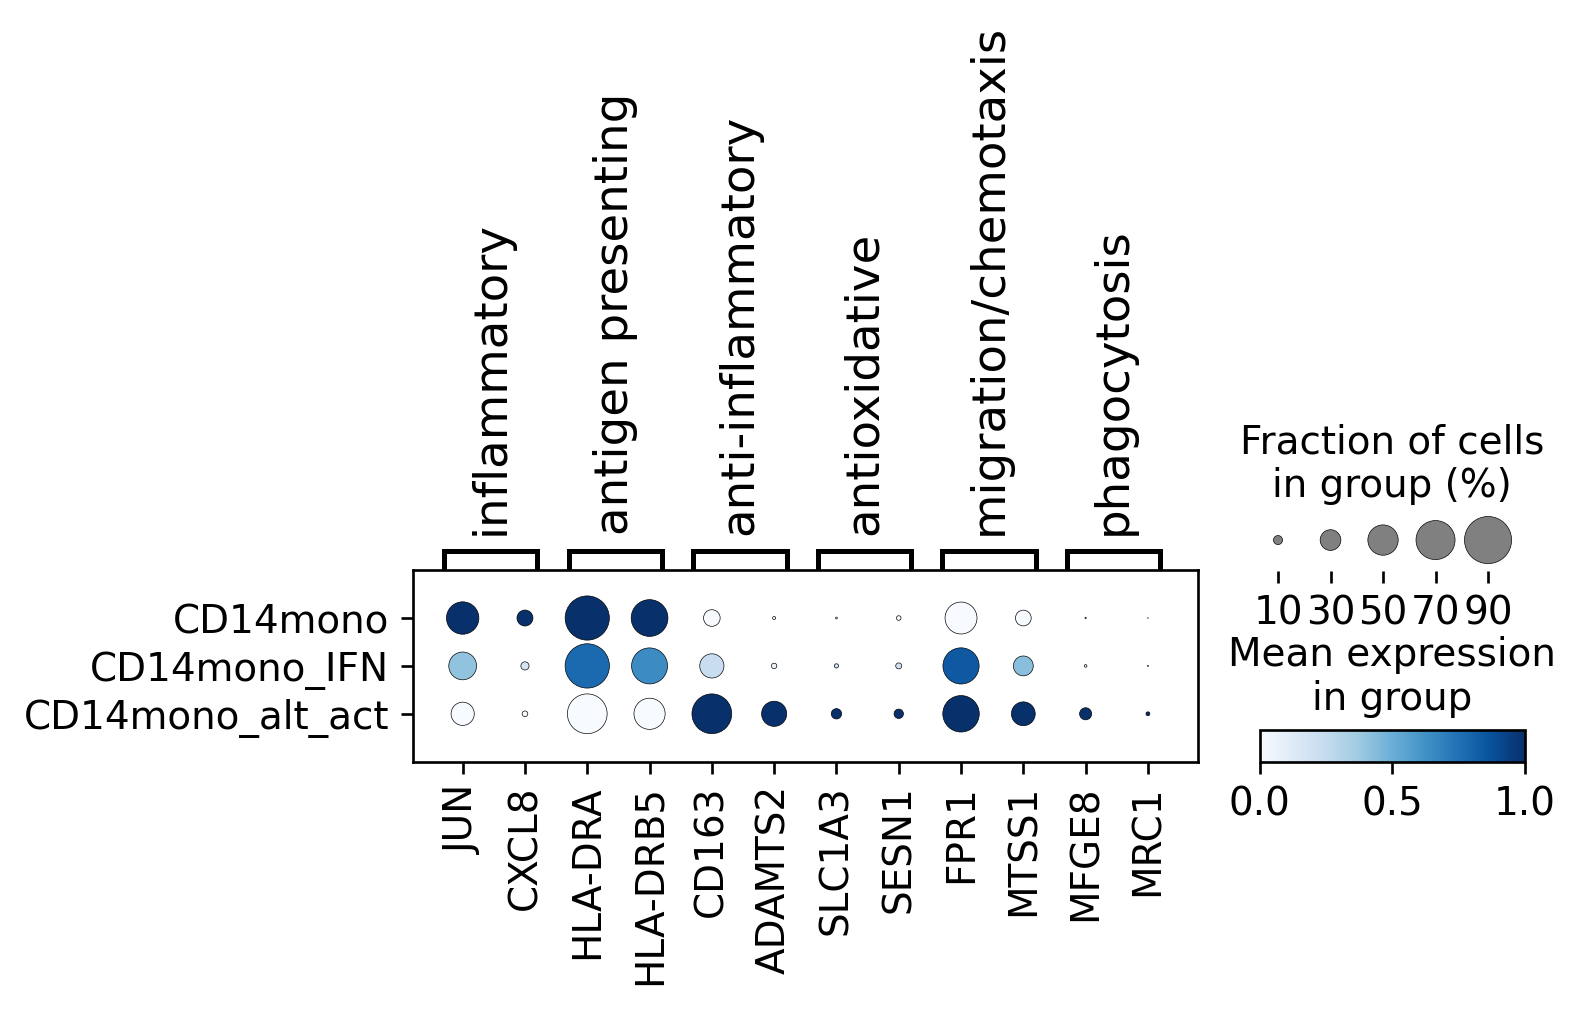

In [11]:
sc.pl.dotplot(CD14only, markers, groupby='annot4', standard_scale = 'var',cmap='Blues')

In [12]:
m =['CD14','VCAN','S100A12','LYZ','CD74','HLA-DRA','HLA-DRB1','FCGR3A','MS4A7','C1QA','C1QB','C1QC','ISG15','CD163']

/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


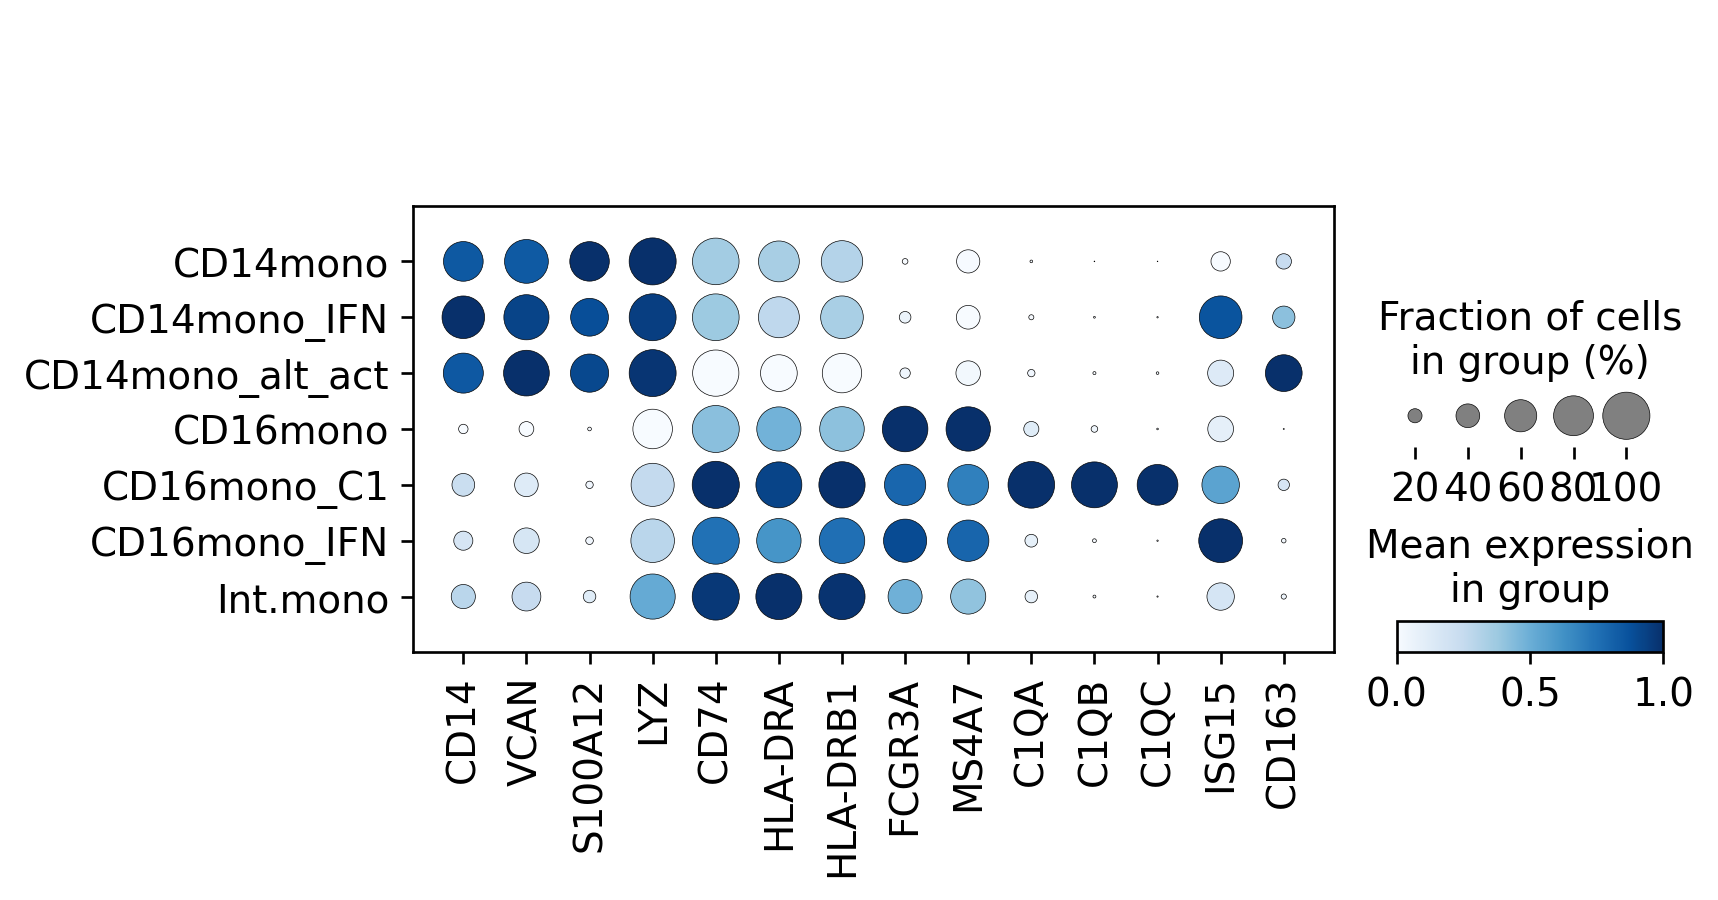

In [13]:
sc.pl.dotplot(monocyte_only, m, groupby='annot4', standard_scale = 'var',cmap='Blues',save='monocyte_markers.pdf')

# cite-seq

In [14]:
adt_raw = sc.read('/home/jovyan/data/covid_19_renal/renal_covid_19_adt_myeloid_soupX_QC.h5ad')
badt_raw = adt_raw[adt_raw.obs_names.isin(CD14only.obs_names)].copy()
badt_raw.obsm = CD14only.obsm.copy()
badt_raw.obs = CD14only.obs.copy()
badt_raw

AnnData object with n_obs × n_vars = 63403 × 137
    obs: 'annotation22_ES', 'centre', 'sample_id', 'sample_id_broad', 'sample_date', 'sample_date_yr', 'pool', 'pool_broad', 'haniffa_broad_predLabel', 'orig.ident', 'merged_souporcell_cluster', 'merged_souporcell_status', 'patient_id', 'case_control', 'WHO_severity', 'sex', 'calc_age', 'discharge_date', 'date_positive_swab', 'date_first_symptoms', 'admission_date', 'ethnicity', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_0.8', '5_subcluster', '9_subcluster', 'annotation', 'annotation23_ES', 'annotation24_ES', 'annot3', 'annot2', 'annot1', 'leiden_0.5', 'annot4'
    var: 'name'
    obsm: 'X_pca', 'X_pca_harmony_orig.ident', 'X_umap'

In [15]:
#normalise
def clr_normalize_each_cell(pdata1, inplace=True):
    """Normalize count vector for each cell, i.e. for each row of .X"""
    import numpy as np
    import scipy
    def seurat_clr(x):
        # TODO: support sparseness
        s = np.sum(np.log1p(x[x > 0]))
        exp = np.exp(s / len(x))
        return np.log1p(x / exp)
    if not inplace:
        pdata1 = pdata1.copy()
    # apply to dense or sparse matrix, along axis. returns dense matrix
    pdata1.X = np.apply_along_axis(
        seurat_clr, 1, (pdata1.X.A if scipy.sparse.issparse(pdata1.X) else pdata1.X)
    )
    return pdata1


In [16]:
badt_raw = clr_normalize_each_cell(badt_raw)

In [17]:
maker_dict = {'Antigen presenting':['AB-HLA-DRA'],'Anti-inflammatory':['AB-CD163']}

/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


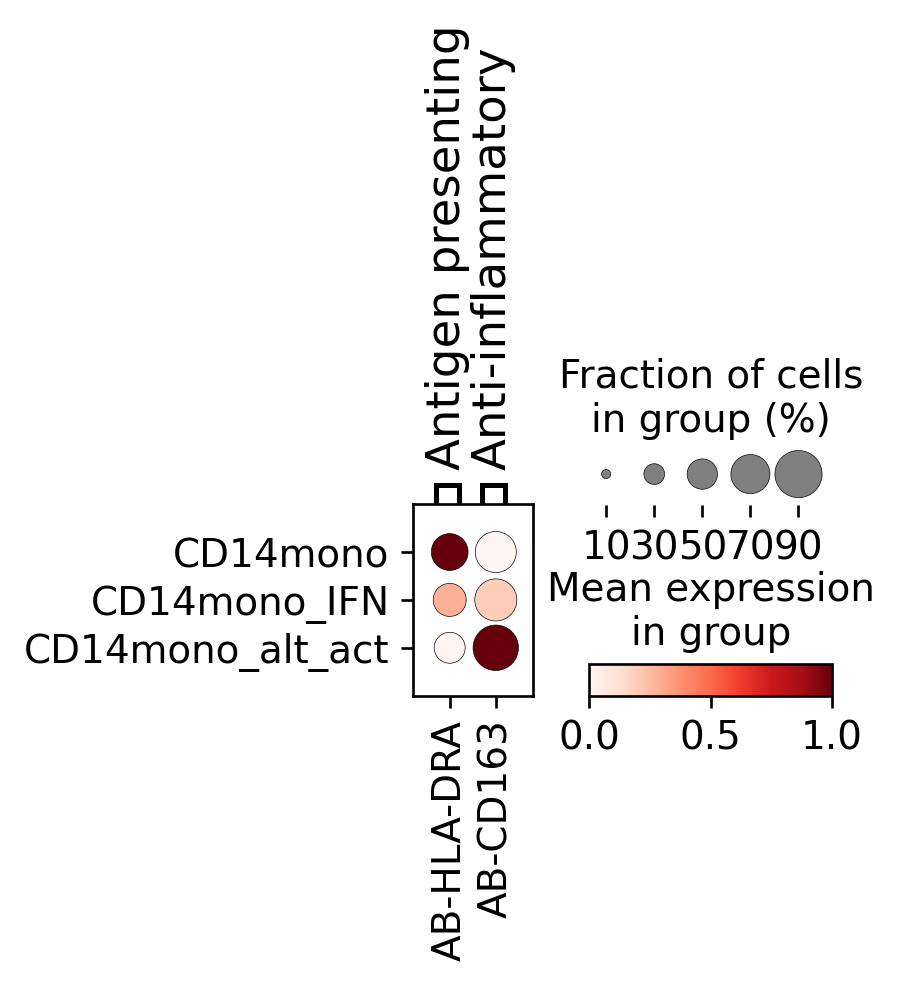

In [18]:
sc.pl.dotplot(badt_raw,maker_dict,groupby='annot4',standard_scale='var',save='cite_seq.pdf')

# umaps

In [19]:
monocyte_only.obs['case_control'].unique()

['NEGATIVE', 'nan', 'POSITIVE', 'RECOVERY']
Categories (4, object): ['NEGATIVE', 'POSITIVE', 'RECOVERY', 'nan']

In [20]:
monocyte_only = monocyte_only[monocyte_only.obs['case_control']!='nan']

In [21]:
monocyte_only.obs['case_control'].unique()

['NEGATIVE', 'POSITIVE', 'RECOVERY']
Categories (3, object): ['NEGATIVE', 'POSITIVE', 'RECOVERY']

In [22]:
monocyte_only.obs['WHO_severity'].unique()
# 'nan' is negative and recovery

['nan', 'severe', 'critical', 'moderate', 'mild']
Categories (5, object): ['critical', 'mild', 'moderate', 'nan', 'severe']

In [23]:
monocyte_only.obs['combined_sev']='uk'
monocyte_only.obs.loc[(monocyte_only.obs["WHO_severity"].isin(['nan'])), "combined_sev"] = 'Negative/Recovery'
monocyte_only.obs.loc[(monocyte_only.obs["WHO_severity"].isin(['mild','moderate'])), "combined_sev"] = 'Mild_moderate'
monocyte_only.obs.loc[(monocyte_only.obs["WHO_severity"].isin(['severe','critical'])), "combined_sev"] = 'Severe_critical'

/tmp/ipykernel_5019/3026878861.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  monocyte_only.obs['combined_sev']='uk'


In [24]:
monocyte_only.obs['combined_sev'].unique()

array(['Negative/Recovery', 'Severe_critical', 'Mild_moderate'],
      dtype=object)

In [25]:
monocyte_only.obs['combined_sev'] = monocyte_only.obs['combined_sev'].astype('category')

In [26]:
sc.tl.embedding_density(monocyte_only, basis='umap', groupby='combined_sev')

computing density on 'umap'
--> added
    'umap_density_combined_sev', densities (adata.obs)
    'umap_density_combined_sev_params', parameter (adata.uns)


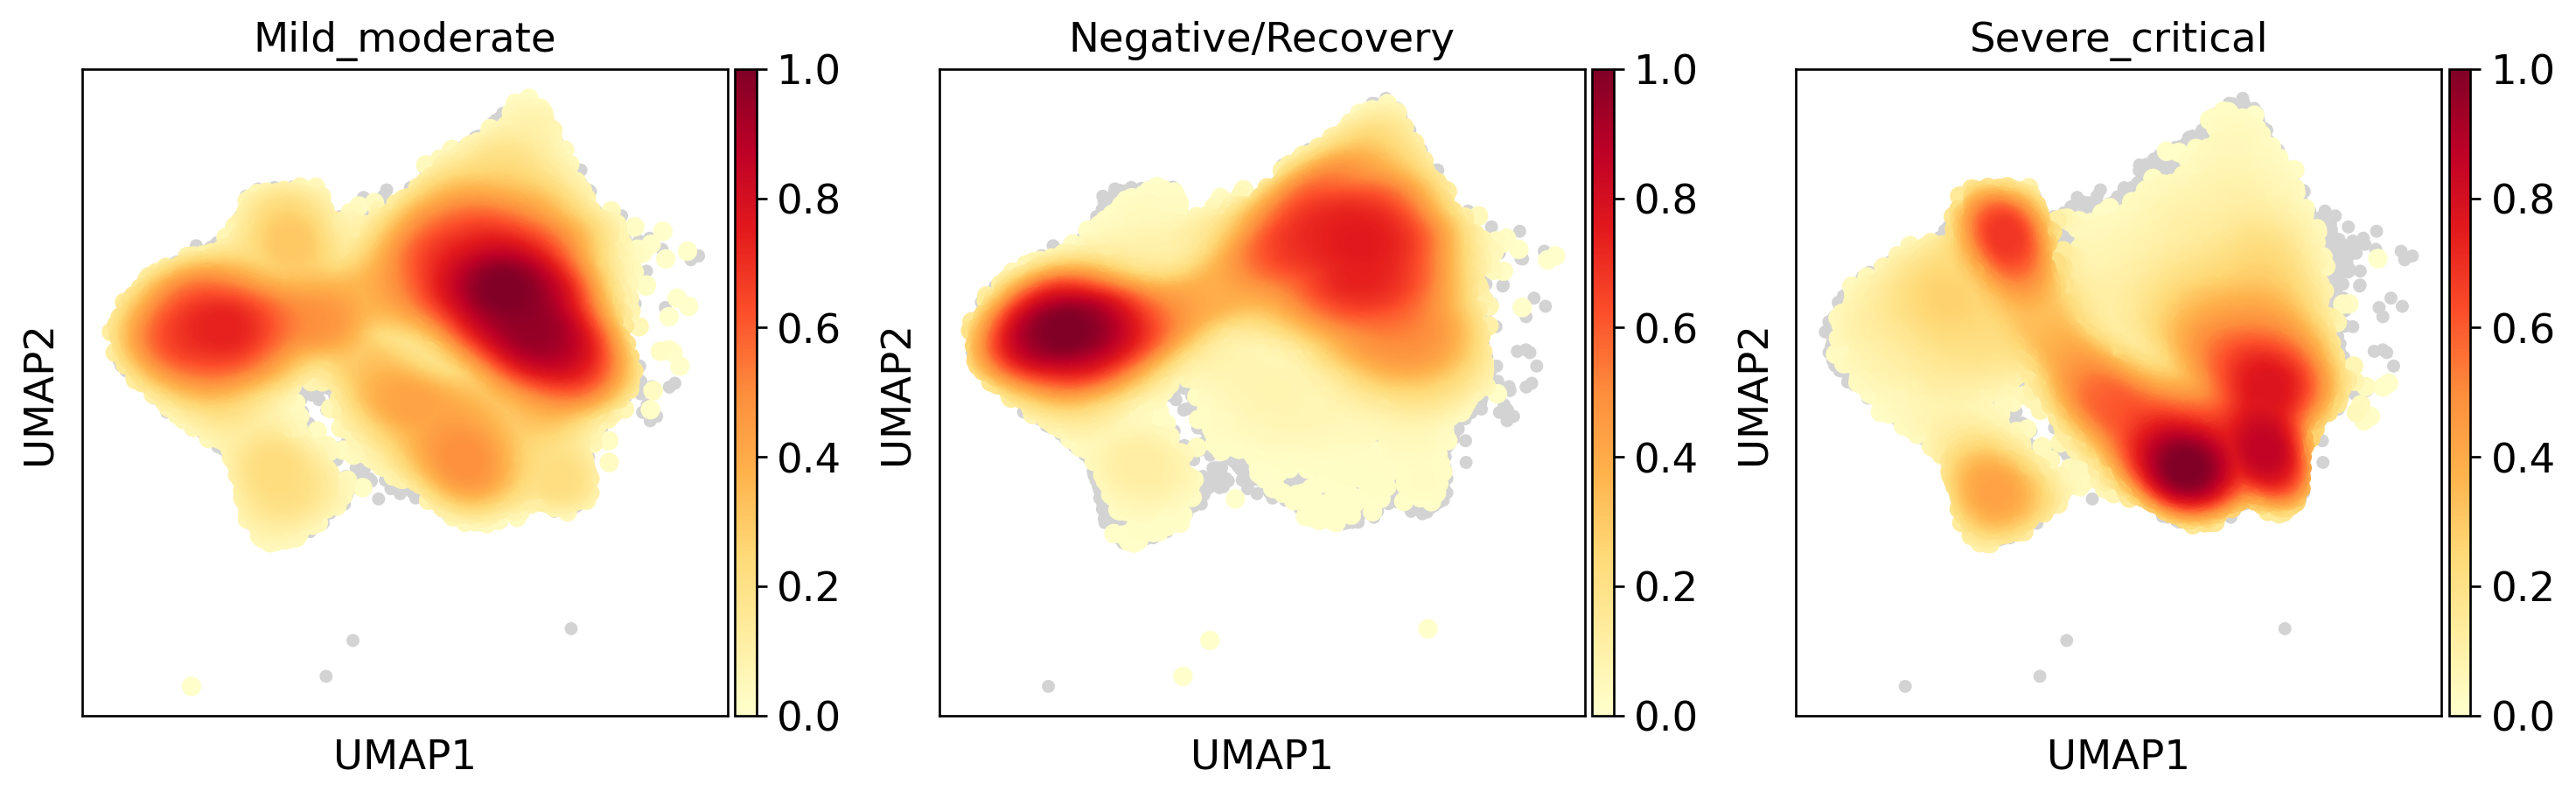

In [27]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.embedding_density(monocyte_only, basis='umap', key='umap_density_combined_sev',save='densityplot_monocyte.pdf')

/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


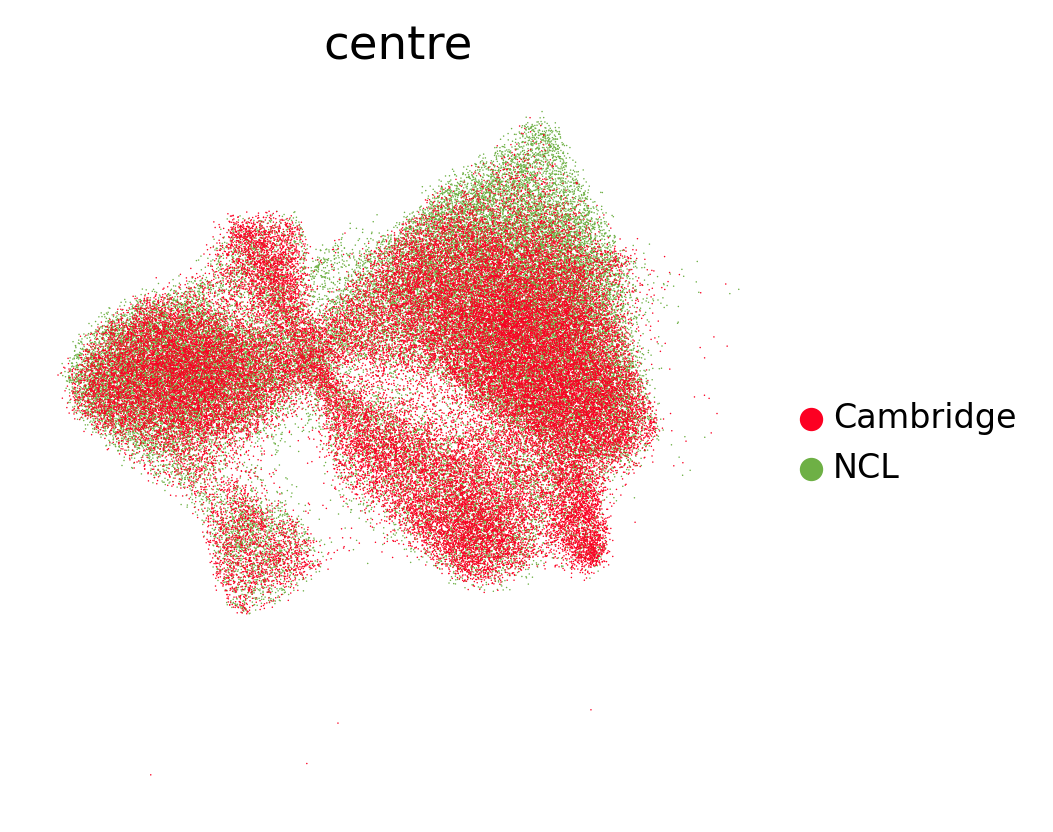

In [28]:
with rc_context({'figure.figsize': (4, 4)}): 
    sc.pl.umap(monocyte_only,use_raw=False,neighbors_key='X_pca_harmony_orig.ident',size =0.8,color=['centre'], legend_fontsize = 10,frameon=False,palette=
              {'NCL':'#6EB045',
              'Cambridge':'#FC0022'},save='monocyte_only_yr.pdf')



In [29]:
monocyte_only.obs['case_control'].unique()

['NEGATIVE', 'POSITIVE', 'RECOVERY']
Categories (3, object): ['NEGATIVE', 'POSITIVE', 'RECOVERY']

/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


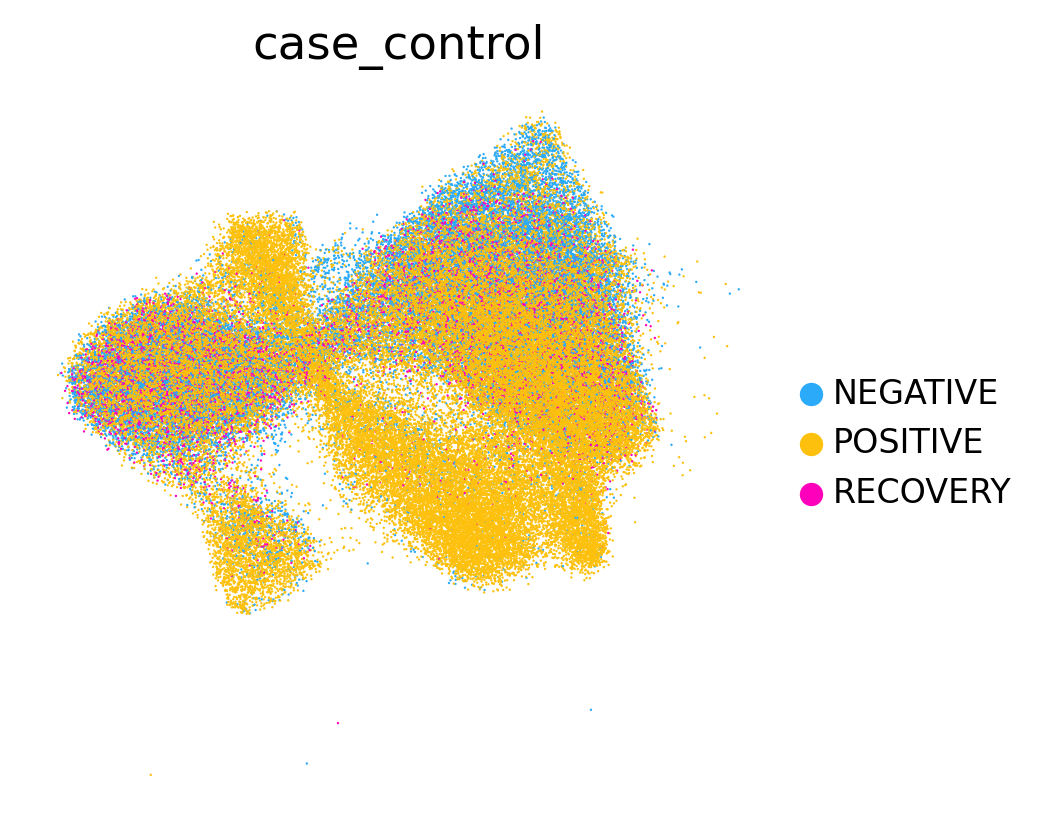

In [30]:
with rc_context({'figure.figsize': (4, 4)}): 
    sc.pl.umap(monocyte_only,use_raw=False,neighbors_key='X_pca_harmony_orig.ident',color=['case_control'], size=2,legend_fontsize = 10,frameon=False,
             palette = {'NEGATIVE':'#2AAAF9', 'POSITIVE':'#FCC00D','RECOVERY':'#FE00BB'},save='monocyte_only_case_control.pdf')

In [31]:
monocyte_only.obs['WHO_severity'].unique()

['nan', 'severe', 'critical', 'moderate', 'mild']
Categories (5, object): ['critical', 'mild', 'moderate', 'nan', 'severe']

In [32]:
monocyte_only.obs['case_control'].unique()

['NEGATIVE', 'POSITIVE', 'RECOVERY']
Categories (3, object): ['NEGATIVE', 'POSITIVE', 'RECOVERY']

/home/jovyan/.local/lib/python3.8/site-packages/scanpy-1.9.1-py3.8.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


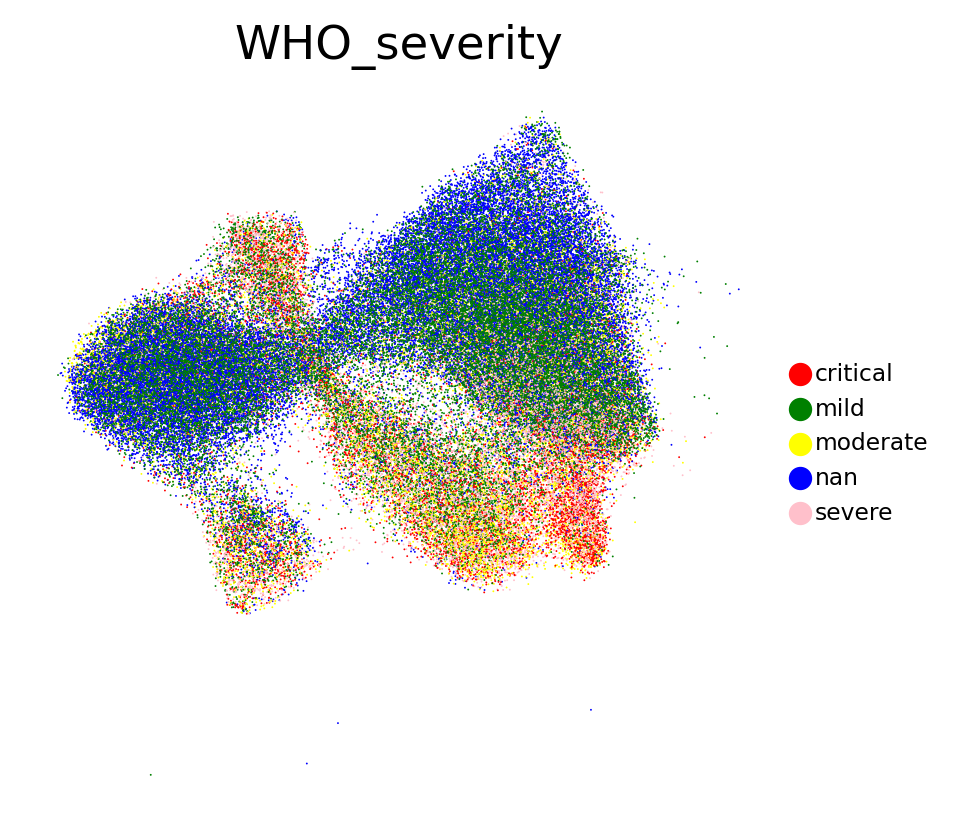

In [33]:
#'nan' in this plot are negative/recovery
with rc_context({'figure.figsize': (4, 4)}): 
    sc.pl.umap(monocyte_only,use_raw=False,neighbors_key='X_pca_harmony_orig.ident',color=['WHO_severity'], legend_fontsize = 7,frameon=False,palette={
        'nan':'blue','mild':'green','moderate':'yellow','severe':'pink','critical':'red'},  save='monocyte_only_severity.pdf')